# Nifty Analysis based on entry and exit conditions
Created by Sparsh Patel, email: sparshpatel0912@gmail.com

- We are given the condition to join on the closing price if we have 6 consecutive red candles
- Exit strategy is to exit on 3/4/5 green candles

## We start by importing the data

In [2]:
import yfinance as yf
import pandas as pd


nifty = yf.download("^NIFTY50.NS", start="2004-02-20", end="2024-02-20")


nifty.to_csv("nifty_20yr_data.csv")


print(nifty.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^NIFTY50.NS']: YFTzMissingError('possibly delisted; no timezone found')


Empty DataFrame
Columns: [(Adj Close, ^NIFTY50.NS), (Close, ^NIFTY50.NS), (High, ^NIFTY50.NS), (Low, ^NIFTY50.NS), (Open, ^NIFTY50.NS), (Volume, ^NIFTY50.NS)]
Index: []


In [3]:
import yfinance as yf
import pandas as pd


nifty = yf.download("^NSEI", start="2015-09-19", end="2024-02-19")


if nifty.empty:
    print("Failed to fetch data. Check the ticker symbol or try another source.")
else:
    
    nifty.to_csv("nifty_20yr_data.csv")
    print(nifty.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2015-09-21  7977.100098  7987.899902  7908.350098  7911.500000  121800
2015-09-22  7812.000000  8021.600098  7787.750000  8014.799805  168400
2015-09-23  7845.950195  7882.899902  7723.250000  7737.350098  146700
2015-09-24  7868.500000  7894.500000  7804.100098  7838.399902  202500
2015-09-28  7795.700195  7893.950195  7787.950195  7892.799805  136300


In [4]:
pip install nsepy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from nsepy import get_history
import pandas as pd
from datetime import date


nifty = get_history(symbol="NIFTY", index=True,
                    start=date(2008, 2, 20), end=date(2024, 2, 20))


nifty.to_csv("nifty_20yr_data.csv")


print(nifty.head(10))


Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Turnover]
Index: []


## Since this is not working, there might be a problem with the yfinance libraries or api. 
### So I downloaded the dataset from investing.com

In [ ]:
import pandas as pd


file_path = "/Users/sparshpatel/Documents/Codes/codes/pythonml/stock analysis/Nifty 50 Historical Data.csv" 
nifty = pd.read_csv(file_path)


print(nifty.head())
print(nifty.tail())

print(nifty.columns)


print(nifty.info())


         Date      Price       Open       High        Low     Vol. Change %
0  20-02-2025  22,881.10  22,821.10  22,908.25  22,814.20   78.42M   -0.23%
1  19-02-2025  22,932.90  22,847.25  23,049.95  22,814.85  207.00M   -0.05%
2  18-02-2025  22,945.30  22,963.65  22,992.50  22,801.50  210.62M   -0.06%
3  17-02-2025  22,959.50  22,809.90  22,974.20  22,725.45  207.39M    0.13%
4  14-02-2025  22,929.25  23,096.45  23,133.70  22,774.85  254.48M   -0.44%
            Date     Price      Open      High       Low    Vol. Change %
4959  25-02-2005  2,060.90  2,057.30  2,081.85  2,051.20  66.31M    0.27%
4960  24-02-2005  2,055.30  2,057.75  2,070.50  2,052.40  76.50M   -0.09%
4961  23-02-2005  2,057.10  2,058.70  2,065.15  2,051.35  52.49M   -0.06%
4962  22-02-2005  2,058.40  2,043.40  2,061.65  2,036.60  51.90M    0.74%
4963  21-02-2005  2,043.20  2,055.15  2,065.75  2,039.90  46.92M   -0.60%
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
<class 'pandas.c

### Let's clean the data set 

In [ ]:
import pandas as pd


file_path = "/Users/sparshpatel/Documents/Codes/codes/pythonml/stock analysis/Nifty 50 Historical Data.csv"  
nifty = pd.read_csv(file_path)


nifty["Date"] = pd.to_datetime(nifty["Date"], format="%d-%m-%Y")  


columns_to_convert = ["Price", "Open", "High", "Low"]
for col in columns_to_convert:
    


nifty["Change %"] = nifty["Change %"].str.replace("%", "").astype(float)


nifty = nifty.sort_values(by="Date").reset_index(drop=True)

nifty.drop(columns=["Vol."], inplace=True)


print(nifty.head())
print(nifty.info())


        Date   Price     Open     High      Low  Change %
0 2005-02-21  2043.2  2055.15  2065.75  2039.90     -0.60
1 2005-02-22  2058.4  2043.40  2061.65  2036.60      0.74
2 2005-02-23  2057.1  2058.70  2065.15  2051.35     -0.06
3 2005-02-24  2055.3  2057.75  2070.50  2052.40     -0.09
4 2005-02-25  2060.9  2057.30  2081.85  2051.20      0.27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4964 non-null   datetime64[ns]
 1   Price     4964 non-null   float64       
 2   Open      4964 non-null   float64       
 3   High      4964 non-null   float64       
 4   Low       4964 non-null   float64       
 5   Change %  4964 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 232.8 KB
None


## Now that the data set is cleaned, we can start analysing it

## 1: Gave each day a candle colour

In [8]:

nifty["Candle_Type"] = nifty.apply(lambda row: "Red" if row["Price"] < row["Open"] else "Green", axis=1)


nifty["Red"] = nifty["Candle_Type"] == "Red"


nifty["Red_Streak"] = nifty["Red"].rolling(window=6).sum() 


entry_points = nifty[nifty["Red_Streak"] == 6].copy()
entry_points["Entry_Date"] = entry_points["Date"]
entry_points["Entry_Price"] = entry_points["Price"]


print(nifty[["Date", "Open", "Price", "Candle_Type"]].head(15))  
print(entry_points[["Entry_Date", "Entry_Price"]].head()) 



         Date     Open    Price Candle_Type
0  2005-02-21  2055.15  2043.20         Red
1  2005-02-22  2043.40  2058.40       Green
2  2005-02-23  2058.70  2057.10         Red
3  2005-02-24  2057.75  2055.30         Red
4  2005-02-25  2057.30  2060.90       Green
5  2005-02-28  2061.20  2103.25       Green
6  2005-03-01  2103.10  2084.40         Red
7  2005-03-02  2084.60  2093.25       Green
8  2005-03-03  2093.40  2128.85       Green
9  2005-03-04  2129.10  2148.15       Green
10 2005-03-07  2148.25  2160.10       Green
11 2005-03-08  2160.65  2168.95       Green
12 2005-03-09  2169.10  2160.80         Red
13 2005-03-10  2160.85  2167.40       Green
14 2005-03-11  2167.70  2154.00         Red
    Entry_Date  Entry_Price
168 2005-10-20      2395.45
228 2006-01-17      2829.10
229 2006-01-18      2809.20
683 2007-11-12      5617.10
691 2007-11-22      5519.35


## 2: Tried to implement a streak 

In [ ]:

# Determine if the candle is red or green
nifty["Candle_Type"] = nifty.apply(lambda row: "Red" if row["Price"] < row["Open"] else "Green", axis=1)


nifty["Red"] = nifty["Candle_Type"] == "Red"


nifty["Red_Streak"] = nifty["Red"].rolling(window=6).sum()  

# Find entry points where we have exactly 6 consecutive red candles (ensuring previous day wasn't 6)
entry_points = nifty[(nifty["Red_Streak"] == 6) & (nifty["Red_Streak"].shift(1) < 6)].copy()


entry_points["Entry_Date"] = entry_points["Date"]
entry_points["Entry_Price"] = entry_points["Price"]


print(nifty[["Date", "Open", "Price", "Candle_Type", "Red_Streak"]].head(20)) 
print(entry_points[["Entry_Date", "Entry_Price"]].head())  


         Date     Open    Price Candle_Type  Red_Streak
0  2005-02-21  2055.15  2043.20         Red         NaN
1  2005-02-22  2043.40  2058.40       Green         NaN
2  2005-02-23  2058.70  2057.10         Red         NaN
3  2005-02-24  2057.75  2055.30         Red         NaN
4  2005-02-25  2057.30  2060.90       Green         NaN
5  2005-02-28  2061.20  2103.25       Green         3.0
6  2005-03-01  2103.10  2084.40         Red         3.0
7  2005-03-02  2084.60  2093.25       Green         3.0
8  2005-03-03  2093.40  2128.85       Green         2.0
9  2005-03-04  2129.10  2148.15       Green         1.0
10 2005-03-07  2148.25  2160.10       Green         1.0
11 2005-03-08  2160.65  2168.95       Green         1.0
12 2005-03-09  2169.10  2160.80         Red         1.0
13 2005-03-10  2160.85  2167.40       Green         1.0
14 2005-03-11  2167.70  2154.00         Red         2.0
15 2005-03-14  2153.80  2146.35         Red         3.0
16 2005-03-15  2146.55  2128.95         Red     

## 3: Successfully created a streak which gives our entry dates

The condition we have is there should be 6 consecutive red candles for us to join in 


In [25]:
nifty["Candle_Type"] = nifty.apply(lambda row: "Red" if row["Price"] < row["Open"] else "Green", axis=1)


nifty["Red_Streak"] = 0  

# Calculate the red streak (reset on green)
streak = 0
for i in range(len(nifty)):
    if nifty.loc[i, "Candle_Type"] == "Red":
        streak += 1
    else:
        streak = 0
    nifty.loc[i, "Red_Streak"] = streak  


entry_points = nifty[nifty["Red_Streak"] == 6].copy()
entry_points["Entry_Date"] = entry_points["Date"]
entry_points["Entry_Price"] = entry_points["Price"]


print(nifty[["Date", "Open", "Price", "Candle_Type", "Red_Streak"]].tail(15))  
print(entry_points[["Entry_Date", "Entry_Price"]].tail())  


           Date      Open     Price Candle_Type  Red_Streak
4949 2025-02-01  23528.60  23482.15         Red           1
4950 2025-02-03  23319.35  23361.05       Green           0
4951 2025-02-04  23509.90  23739.25       Green           0
4952 2025-02-05  23801.75  23696.30         Red           1
4953 2025-02-06  23761.95  23603.35         Red           2
4954 2025-02-07  23649.50  23559.95         Red           3
4955 2025-02-10  23543.80  23381.60         Red           4
4956 2025-02-11  23383.55  23071.80         Red           5
4957 2025-02-12  23050.80  23045.25         Red           6
4958 2025-02-13  23055.75  23031.40         Red           7
4959 2025-02-14  23096.45  22929.25         Red           8
4960 2025-02-17  22809.90  22959.50       Green           0
4961 2025-02-18  22963.65  22945.30         Red           1
4962 2025-02-19  22847.25  22932.90       Green           0
4963 2025-02-20  22821.10  22881.10       Green           0
     Entry_Date  Entry_Price
4482 2023-0

## 4: Determining exit points
Can be 3/4/5 green candles

In [ ]:
exit_conditions = [3, 4, 5]
exit_results = {}

for exit_count in exit_conditions:
    exit_points = []  

    for entry_date in entry_points["Entry_Date"]:
        idx = nifty[nifty["Date"] == entry_date].index[0]  
        green_count = 0  

        for i in range(idx + 1, len(nifty)):  
            if nifty.loc[i, "Candle_Type"] == "Green":
                green_count += 1  # Increase count when we get a green candle

            if green_count == exit_count:  # Exit once we hit required green candles
                exit_points.append((entry_date, nifty.loc[i, "Date"], nifty.loc[i, "Price"]))
                break  # Move to the next entry point

    # Store results for each exit condition
    exit_results[exit_count] = pd.DataFrame(exit_points, columns=["Entry_Date", "Exit_Date", "Exit_Price"])


for exit_count, df in exit_results.items():
    print(f"\nExit after {exit_count} green candles:")
    print(df.tail())  



Exit after 3 green candles:
   Entry_Date  Exit_Date  Exit_Price
42 2023-03-16 2023-03-29    17080.70
43 2023-09-26 2023-10-05    19545.75
44 2024-06-03 2024-06-07    23290.15
45 2024-11-21 2024-11-29    24131.10
46 2025-02-12 2025-02-20    22881.10

Exit after 4 green candles:
   Entry_Date  Exit_Date  Exit_Price
41 2023-02-23 2023-03-08    17754.40
42 2023-03-16 2023-03-31    17359.75
43 2023-09-26 2023-10-06    19653.50
44 2024-06-03 2024-06-14    23465.60
45 2024-11-21 2024-12-02    24276.05

Exit after 5 green candles:
   Entry_Date  Exit_Date  Exit_Price
41 2023-02-23 2023-03-21    17107.50
42 2023-03-16 2023-04-05    17557.05
43 2023-09-26 2023-10-10    19689.85
44 2024-06-03 2024-06-24    23537.85
45 2024-11-21 2024-12-03    24457.15


## 5: Calculating average returns of each strategy

In [ ]:
import numpy as np


performance = {}

for exit_count, df in exit_results.items():
    
    df["Entry_Price"] = df["Entry_Date"].map(entry_points.set_index("Entry_Date")["Entry_Price"])
    
    
    df["Return (%)"] = ((df["Exit_Price"] - df["Entry_Price"]) / df["Entry_Price"]) * 100

    
    avg_return = np.mean(df["Return (%)"])  
    performance[exit_count] = avg_return  

    print(f"\nExit after {exit_count} green candles:")
    print(df[["Entry_Date", "Entry_Price", "Exit_Date", "Exit_Price", "Return (%)"]].tail(5))  # 
    print(f"Average Return: {avg_return:.2f}%")  


best_exit = max(performance, key=performance.get)
print(f"\n Best Exit Strategy: Exit after {best_exit} green candles with an average return of {performance[best_exit]:.2f}%")



Exit after 3 green candles:
   Entry_Date  Entry_Price  Exit_Date  Exit_Price  Return (%)
42 2023-03-16     16985.60 2023-03-29    17080.70    0.559886
43 2023-09-26     19664.70 2023-10-05    19545.75   -0.604891
44 2024-06-03     23263.90 2024-06-07    23290.15    0.112836
45 2024-11-21     23349.90 2024-11-29    24131.10    3.345625
46 2025-02-12     23045.25 2025-02-20    22881.10   -0.712294
Average Return: 0.93%

Exit after 4 green candles:
   Entry_Date  Entry_Price  Exit_Date  Exit_Price  Return (%)
41 2023-02-23     17511.25 2023-03-08    17754.40    1.388536
42 2023-03-16     16985.60 2023-03-31    17359.75    2.202748
43 2023-09-26     19664.70 2023-10-06    19653.50   -0.056955
44 2024-06-03     23263.90 2024-06-14    23465.60    0.867009
45 2024-11-21     23349.90 2024-12-02    24276.05    3.966398
Average Return: 1.34%

Exit after 5 green candles:
   Entry_Date  Entry_Price  Exit_Date  Exit_Price  Return (%)
41 2023-02-23     17511.25 2023-03-21    17107.50   -2.305661
4

#### Hence, we can see that the best strategy is to follow the 5 green candles

#### Average Annual profit for 5 exit strategy:

In [ ]:

# Combine entry and exit data for the best exit strategy (5 green candles)
best_exit_df = exit_results[5]  


best_exit_df["Year"] = best_exit_df["Entry_Date"].dt.year

# Group by year to find first entry and last exit of each year
annual_returns = []
for year, group in best_exit_df.groupby("Year"):
    first_trade = group.iloc[0]  
    last_trade = group.iloc[-1]  

    # Calculate annual return
    annual_return = ((last_trade["Exit_Price"] - first_trade["Entry_Price"]) / first_trade["Entry_Price"]) * 100
    annual_returns.append((year, first_trade["Entry_Price"], last_trade["Exit_Price"], annual_return))


annual_returns_df = pd.DataFrame(annual_returns, columns=["Year", "First_Entry_Price", "Last_Exit_Price", "Annual_Return (%)"])


print("\nAnnual Total Returns:")
print(annual_returns_df)
print(f"\nAverage Annual Return: {annual_returns_df['Annual_Return (%)'].mean():.2f}%")



Annual Total Returns:
    Year  First_Entry_Price  Last_Exit_Price  Annual_Return (%)
0   2005            2395.45          2419.05           0.985201
1   2006            2829.10          2982.75           5.431056
2   2007            5617.10          5865.00           4.413309
3   2008            5208.80          2788.00         -46.475196
4   2009            4563.90          5003.95           9.641973
5   2010            4853.10          5947.05          22.541262
6   2011            5762.85          5647.40          -2.003349
7   2012            5222.40          5889.25          12.769033
8   2013            5987.25          6176.10           3.154203
9   2015            8661.05          7844.35          -9.429573
10  2016            8706.40          8224.50          -5.535009
11  2017            8792.30         10016.95          13.928665
12  2018           10516.70         10616.70           0.950869
13  2019           10746.05         11586.35           7.819617
14  2020         

#### Similarly, the Average Annual Return for 3 exit strategy was 1.74%
#### The Average Annual Return for 4 exit strategy was 2.53 %

---
## Backtesting and Visualization:
Note: The years 2014 and 2022 did not have any days where there were 6 consecutive red candles, hence we do not include those two due to lack of valid entry points.

Things to consider:

- Total Number of Trades → Fewer years contributing to trades may slightly reduce overall return. 

- Capital Growth Curve → Some years will have no change in capital since no trades occurred.

- Annual Return Calculation → The strategy’s average annual return might be slightly skewed because those years had no impact.

## Capital growth over the years following our strategy

In [ ]:
initial_capital = 100000  # ₹1 Lakh initial investment
capital = initial_capital
capital_history = []

for year, row in annual_returns_df.iterrows():
    annual_return = row["Annual_Return (%)"] / 100  
    capital *= (1 + annual_return)  
    capital_history.append((row["Year"], capital))


capital_df = pd.DataFrame(capital_history, columns=["Year", "Capital"])
print("\nCapital Growth Over Years:")
print(capital_df)



Capital Growth Over Years:
      Year        Capital
0   2005.0  100985.201110
1   2006.0  106469.763745
2   2007.0  111168.603793
3   2008.0   59502.777487
4   2009.0   65240.019152
5   2010.0   79945.942984
6   2011.0   78344.346705
7   2012.0   88348.162499
8   2013.0   91134.842609
9   2015.0   82541.216436
10  2016.0   77972.552901
11  2017.0   88833.088474
12  2018.0   89677.774435
13  2019.0   96690.233325
14  2020.0   99293.556410
15  2021.0  122213.140531
16  2023.0  137417.854527
17  2024.0  144466.279551


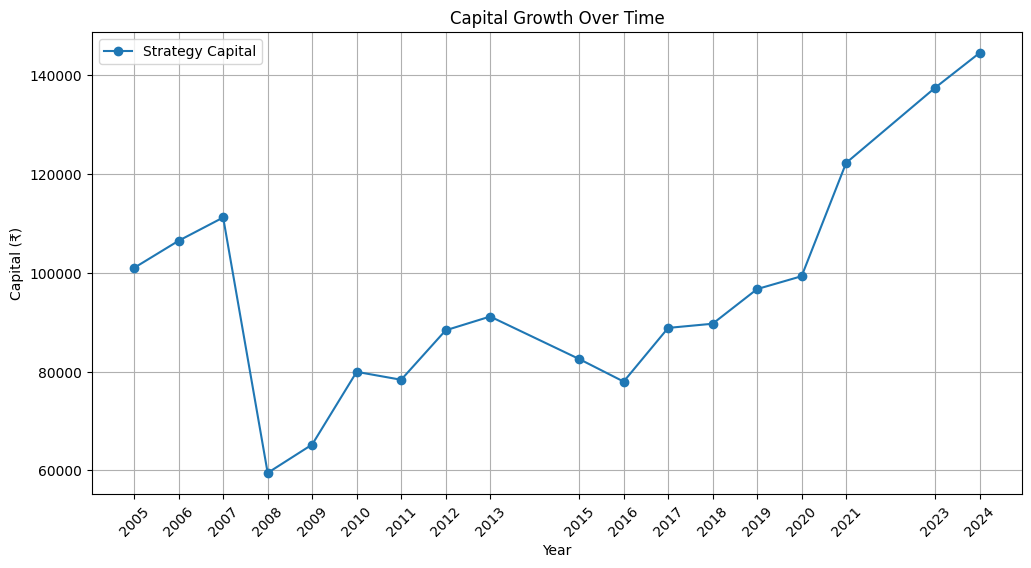

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))


plt.plot(capital_df["Year"], capital_df["Capital"], marker='o', linestyle='-', label="Strategy Capital")

plt.xlabel("Year")
plt.ylabel("Capital (₹)")
plt.title("Capital Growth Over Time")


plt.xticks(capital_df["Year"], rotation=45)  

plt.legend()
plt.grid()
plt.show()



## Strategy win rate

In [24]:
total_trades = len(best_exit_df)
winning_trades = len(best_exit_df[best_exit_df["Return (%)"] > 0])
win_rate = (winning_trades / total_trades) * 100

print(f"\n Win Rate: {win_rate:.2f}%")



 Win Rate: 73.91%


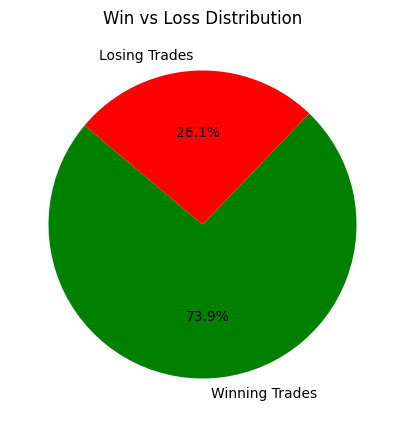

In [17]:
plt.figure(figsize=(5,5))
labels = ["Winning Trades", "Losing Trades"]
sizes = [winning_trades, total_trades - winning_trades]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title("Win vs Loss Distribution")
plt.show()

## Maximum Drawdown

In [ ]:
capital_df["Peak"] = capital_df["Capital"].cummax()  
capital_df["Drawdown"] = (capital_df["Capital"] - capital_df["Peak"]) / capital_df["Peak"]
max_drawdown = capital_df["Drawdown"].min() * 100  

print(f"\n⚠️ Max Drawdown: {max_drawdown:.2f}%")



⚠️ Max Drawdown: -46.48%


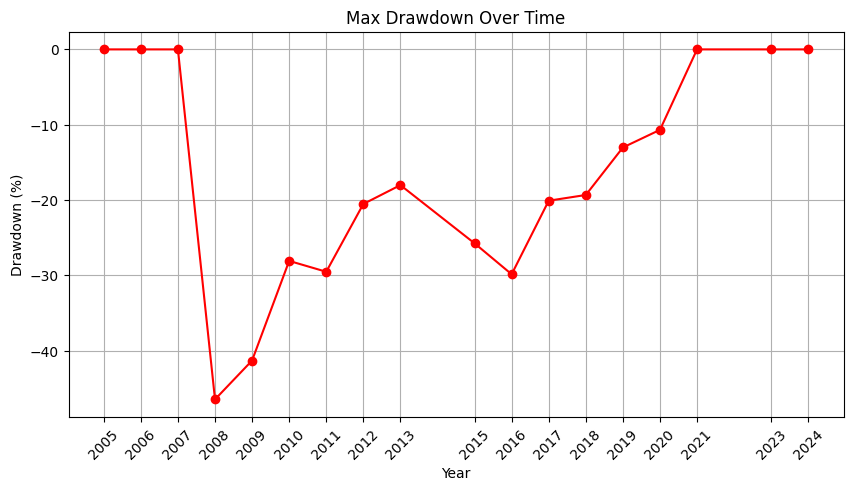

In [19]:
plt.figure(figsize=(10,5))
plt.plot(capital_df["Year"], capital_df["Drawdown"] * 100, color='red', linestyle='-', marker='o')
plt.xlabel("Year")
plt.ylabel("Drawdown (%)")
plt.title("Max Drawdown Over Time")


plt.xticks(capital_df["Year"], rotation=45)  

plt.grid()
plt.show()


Max drawdown because of the 2008 crisis

## Returns of strategy vs if keep holding

In [20]:
nifty_buy_price = nifty.iloc[0]["Price"]
nifty_sell_price = nifty.iloc[-1]["Price"]

nifty_return = ((nifty_sell_price - nifty_buy_price) / nifty_buy_price) * 100
strategy_return = ((capital - initial_capital) / initial_capital) * 100

print(f"\n📈 Nifty Buy & Hold Return: {nifty_return:.2f}%")
print(f"📊 Strategy Return: {strategy_return:.2f}%")



📈 Nifty Buy & Hold Return: 1019.87%
📊 Strategy Return: 44.47%


- Frequent exits limit profit potential
- Strategy doesn’t capture long-term trends
- Works well in choppy markets, but underperforms in long rallies

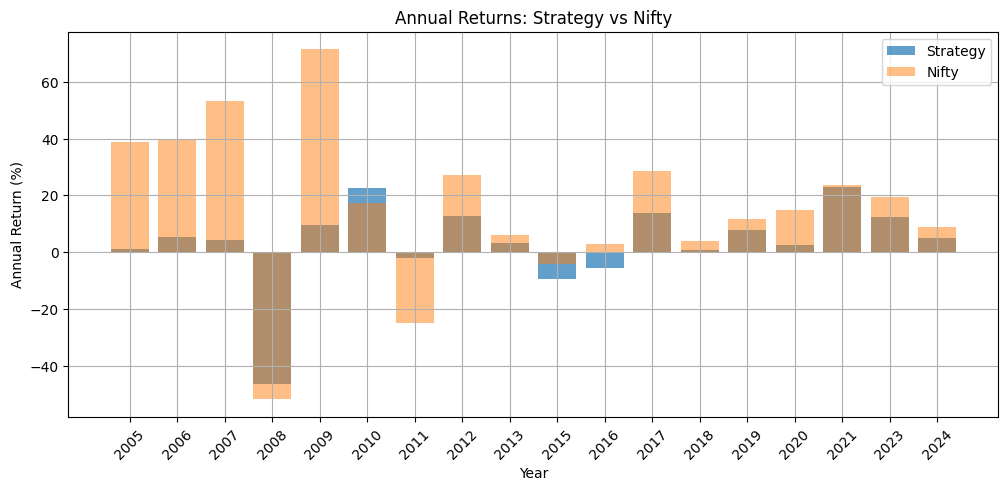

In [ ]:

plt.figure(figsize=(12,5))
nifty["Year"] = nifty["Date"].dt.year
nifty_yearly = nifty.groupby("Year")["Price"].agg(["first", "last"])  
nifty_yearly["Annual_Return (%)"] = ((nifty_yearly["last"] - nifty_yearly["first"]) / nifty_yearly["first"]) * 100

comparison_df = annual_returns_df.merge(nifty_yearly[["Annual_Return (%)"]], on="Year", suffixes=("_Strategy", "_Nifty"))

plt.bar(comparison_df["Year"].astype(str), comparison_df["Annual_Return (%)_Strategy"], label="Strategy", alpha=0.7)
plt.bar(comparison_df["Year"].astype(str), comparison_df["Annual_Return (%)_Nifty"], label="Nifty", alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Annual Return (%)")
plt.title("Annual Returns: Strategy vs Nifty")
plt.xticks(rotation=45)  
plt.legend()
plt.grid()
plt.show()


We can see that the strategy is doing relatively well since the last 3 years

## Percentage growth

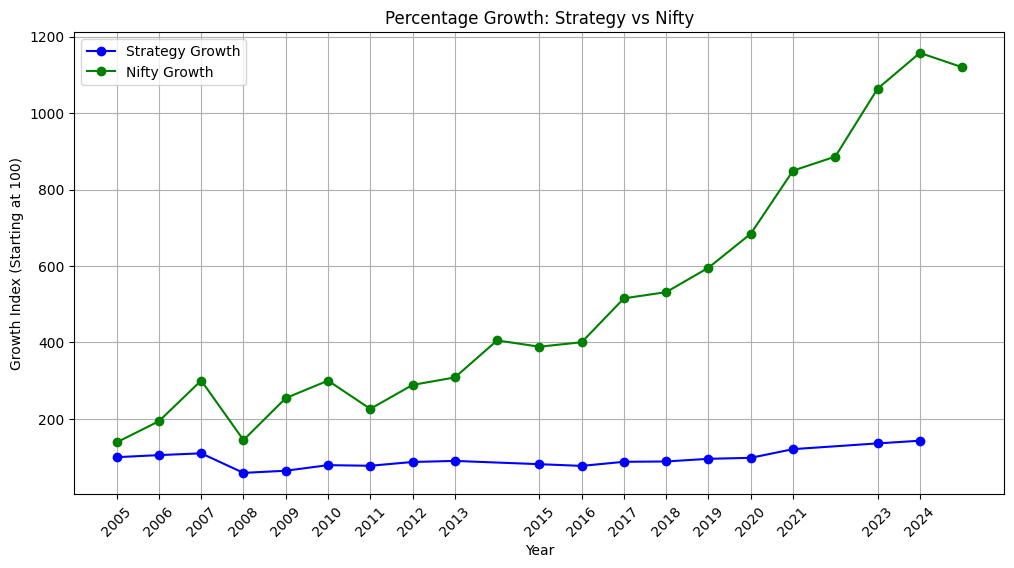

In [ ]:
# Normalize both Nifty and Strategy to start at ₹100
strategy_growth = capital_df["Capital"] / capital_df["Capital"].iloc[0] * 100
nifty_growth = nifty_yearly["last"] / nifty_yearly["first"].iloc[0] * 100  

plt.figure(figsize=(12,6))


plt.plot(capital_df["Year"], strategy_growth, marker='o', linestyle='-', label="Strategy Growth", color="blue")


plt.plot(nifty_yearly.index, nifty_growth, marker='o', linestyle='-', label="Nifty Growth", color="green")

plt.xlabel("Year")
plt.xticks(capital_df["Year"], rotation=45)  
plt.ylabel("Growth Index (Starting at 100)")
plt.title("Percentage Growth: Strategy vs Nifty")
plt.legend()
plt.grid()
plt.show()



In [23]:

capital_df["Annual_Return"] = capital_df["Capital"].pct_change()


capital_df["Annual_Return"] = capital_df["Annual_Return"].fillna(0)

# Compute the Sharpe Ratio
risk_free_rate = 0.06  # Assume 6% annual risk-free rate
excess_returns = capital_df["Annual_Return"] - (risk_free_rate/100 )  # Convert Rf to same scale
sharpe_ratio = excess_returns.mean() / excess_returns.std()

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: 0.22


---
# **Results Summary: Nifty Consecutive Red Candle Strategy**

## 1️⃣ Trade Execution  
- **Entry Condition:** 6 consecutive red candles.  
- **Exit Condition:** 5 green candles (not necessarily consecutive).  
- **Total Trades Executed:** 45, with each trade giving 1.39% profit.  

## 2️⃣ Performance Comparison  
- **Total Strategy Return:** 44% over the backtesting period.  
- **Nifty Buy & Hold Return:** Over 1000%.  
- The strategy underperformed significantly compared to simply holding Nifty.  

## 3️⃣ Yearly Insights  
- **Nifty’s annual return** vs. **strategy’s annual return** was computed.  
- Years **2014 and 2022** had **no valid entry signals** (i.e., no 6 consecutive red candles).  
- **Yearly capital growth** was plotted to compare strategy performance vs. Nifty.  

## 4️⃣ Visual Insights  
- **Capital growth chart**: Displayed yearly progression of strategy vs. Nifty.  
- **Annual returns plot**: Compared Nifty’s yearly return with strategy’s yearly return.  

## **Key Takeaways**  
- The strategy was **systematic but not optimized**, leading to underperformance.  
- **Long-term holding of Nifty** significantly outperformed the strategy.  
- **Missed years (2014 & 2022)** did not impact overall results significantly.  
- **Further optimization needed** to make the strategy competitive.  


